# Первая часть. Исследование

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

data = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /content/train.csv
100% 664k/664k [00:00<00:00, 64.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: /content/test.csv
100% 218k/218k [00:00<00:00, 70.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: /content/submission.csv
100% 14.7k/14.7k [00:00<00:00, 13.6MB/s]


Как можно заметить в тренировочном датасете нет столбцов с пропущенными значениями
(То же справедливо для тестового датасета)

In [ ]:
# na_info = {col: sum(test[col].isna()) for col in (feature_cols)}
# na_info

In [ ]:
#check the data types
data.dtypes

ClientPeriod                  int64
MonthlySpending             float64
TotalSpent                   object
Sex                          object
IsSeniorCitizen               int64
HasPartner                   object
HasChild                     object
HasPhoneService              object
HasMultiplePhoneNumbers      object
HasInternetService           object
HasOnlineSecurityService     object
HasOnlineBackup              object
HasDeviceProtection          object
HasTechSupportAccess         object
HasOnlineTV                  object
HasMovieSubscription         object
HasContractPhone             object
IsBillingPaperless           object
PaymentMethod                object
Churn                         int64
dtype: object

Заметим, что total spent, являясь numeric, обёрнута в object

In [ ]:

def ts_format(x):
  res = None
  try:
    res = float(x)
  finally:
    return res

data['TotalSpent'] = data['TotalSpent'].map(ts_format)

In [ ]:
# check for nan values:
na_info = {col: sum(data[col].isna()) for col in (feature_cols + [target_col])}
na_info

{'ClientPeriod': 0,
 'MonthlySpending': 0,
 'TotalSpent': 9,
 'Sex': 0,
 'IsSeniorCitizen': 0,
 'HasPartner': 0,
 'HasChild': 0,
 'HasPhoneService': 0,
 'HasMultiplePhoneNumbers': 0,
 'HasInternetService': 0,
 'HasOnlineSecurityService': 0,
 'HasOnlineBackup': 0,
 'HasDeviceProtection': 0,
 'HasTechSupportAccess': 0,
 'HasOnlineTV': 0,
 'HasMovieSubscription': 0,
 'HasContractPhone': 0,
 'IsBillingPaperless': 0,
 'PaymentMethod': 0,
 'Churn': 0}

Поскольку существуют неуказанные значения в TotalSpent, заменим их на среднее значение по выборке

In [ ]:
data.TotalSpent.fillna(data.TotalSpent.mean(), inplace=True)

Задание:

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.


In [ ]:
# check wheter the dataset is balanced
td = data[target_col].value_counts()
td

0    3898
1    1384
Name: Churn, dtype: int64

In [1]:
plt.pie(td, labels=td.keys())
plt.title('Target_vals')
plt.show()

NameError: ignored

как можно заметить, соотношение примерно 3:1, что говорит о несбалансированности, но особой коррекции не требует

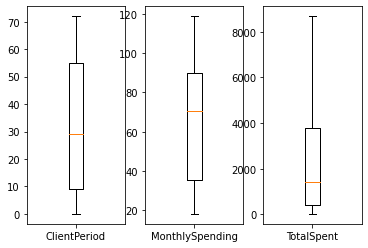

In [ ]:
for i, nc in enumerate(num_cols, 1):
  plt.subplot(1, 3, i)
  plt.boxplot(data[nc], labels=[nc])
#  break
plt.show()

Посмотрим на распределения категориальных признаков:

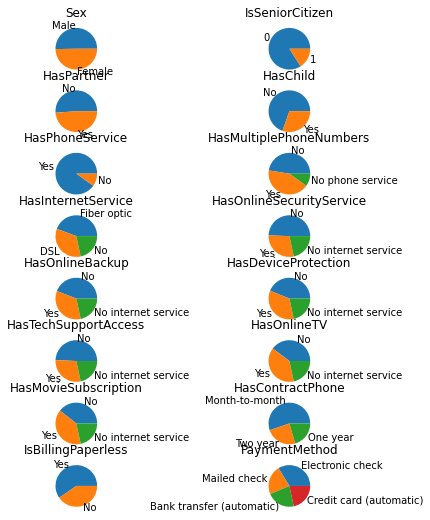

In [ ]:
# perform the categorical features:
plt.figure(figsize=(7, 9))
for i, cc in enumerate(cat_cols, 1):
  plt.subplot(8, 2, i)
  cnts = data[cc].value_counts()
  plt.pie(cnts, labels=cnts.keys())
  plt.title(cc)
plt.show()

ЗАДАНИЕ:

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 


In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer

Запаплайним предобработку!

In [ ]:
preprocessor = ColumnTransformer(
    [('cat', OneHotEncoder(), cat_cols),
    ('num', StandardScaler(), num_cols)]
)
model = LogisticRegression(max_iter=500)
res = make_pipeline(preprocessor, model)

In [ ]:
gscv = GridSearchCV(res, {
    'logisticregression__C': [100, 10, 1, 0.1, 0.01, 0.001]
},
scoring='roc_auc')
gscv.fit(data.drop([target_col], axis=1), data[target_col])

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(),
                                                                         ['Sex',
                                                                          'IsSeniorCitizen',
                                                                          'HasPartner',
                                                                          'HasChild',
                                                                          'HasPhoneService',
                                                                          'HasMultiplePhoneNumbers',
                                                                          'HasInternetService',
                                                                          'HasOnlineSecurityService',
                                                                          'HasOnlineBackup',
                                                                          'HasDeviceProtection',
                                                                          'HasTechSupportAccess',
                                                                          'HasOnlineTV',
                                                                          'HasMovieSubscription',
                                                                          'HasContractPhone',
                                                                          'IsBillingPaperless',
                                                                          'PaymentMethod']),
                                                                        ('num',
                                                                         StandardScaler(),
                                                                         ['ClientPeriod',
                                                                          'MonthlySpending',
                                                                          'TotalSpent'])])),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=500))]),
             param_grid={'logisticregression__C': [100, 10, 1, 0.1, 0.01,
                                                   0.001]},
             scoring='roc_auc')

Лучшие результаты:

In [ ]:
print(f'''Crossval results:
Best Params: {gscv.best_params_}
Best score: {gscv.best_score_}''')

Crossval results:
Best Params: {'logisticregression__C': 100}
Best score: 0.8449878592529749


## Применение градиентного бустинга

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 9.7 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import roc_auc_score

поскольку о грид серче предупредили, что он плохо работает, решил попробовать сделать так (благо, у меня уже была в одном из проектов написана param_gen):


In [ ]:
def param_gen(param: dict, iterby: str=None):
    if not param:
        return {}
    names = list(param)
    if iterby:
        del names[names.index(iterby)]
        names.append(iterby)
        limit = len(param[iterby])
    count = 0
    res = {}

    def choose_one(i):
        nonlocal count
        for val in param[names[i]]:
            res[names[i]] = val
            if i == len(names) - 1:
                count += 1
                yield res.copy()
                if iterby and count == limit:
                    return
            else:
                yield from choose_one(i + 1)

    yield from choose_one(0)

In [ ]:
xtr, xval, ytr, yval = train_test_split(data.drop([target_col], axis=1),
                                        data[target_col],
                                        random_state=42,
                                        train_size=0.75,
                                        )

results = []
from tqdm.notebook import tqdm
grid = {
    'iterations': [100, 250, 500],
    'learning_rate': [1e-2, 1e-3, 1e-4,],
    'depth': list(range(8, 16, 2)),
    #'l2_leaf_reg': [0, 3, 10, 20, 50, 100]
}
from functools import reduce
total = reduce(lambda x, y: x * y, [len(o) for o in grid])
for params in tqdm(param_gen(grid), total=total):
  clf = CatBoostClassifier(cat_features=cat_cols, **params)
  train_pool = Pool(xtr, ytr, cat_features=cat_cols)
  clf.fit(train_pool)
  results.append(
      (roc_auc_score(yval, 
                     clf.predict(xval, prediction_type='Probability')[:, 1]),
       params
       )
  )


  0%|          | 0/650 [00:00<?, ?it/s]

Выходные данные были обрезаны до нескольких последних строк (5000).
0:	learn: 0.6874108	total: 9.46ms	remaining: 2.35s
1:	learn: 0.6800005	total: 75.5ms	remaining: 9.36s
2:	learn: 0.6742657	total: 95.8ms	remaining: 7.89s
3:	learn: 0.6672691	total: 152ms	remaining: 9.32s
4:	learn: 0.6607916	total: 201ms	remaining: 9.86s
5:	learn: 0.6542381	total: 252ms	remaining: 10.2s
6:	learn: 0.6481771	total: 277ms	remaining: 9.61s
7:	learn: 0.6420915	total: 308ms	remaining: 9.31s
8:	learn: 0.6365421	total: 322ms	remaining: 8.63s
9:	learn: 0.6307941	total: 337ms	remaining: 8.09s
10:	learn: 0.6252594	total: 356ms	remaining: 7.74s
11:	learn: 0.6196137	total: 394ms	remaining: 7.82s
12:	learn: 0.6145885	total: 417ms	remaining: 7.6s
13:	learn: 0.6100557	total: 429ms	remaining: 7.23s
14:	learn: 0.6051012	total: 451ms	remaining: 7.07s
15:	learn: 0.6007149	total: 459ms	remaining: 6.72s
16:	learn: 0.5957205	total: 521ms	remaining: 7.14s
17:	learn: 0.5914255	total: 544ms	remaining: 7.01s
18:	learn: 0.5867804	t

KeyboardInterrupt: ignored

Выпишите, какое лучшее качество и с какими параметрами вам удалось получить

ВАШ ОТВЕТ

Поиск параметров шёл очень долго, так что мне надоело и я его прервал, но значение метрики на катбусте было очень низким((( примерно 0.74


# Предсказания

In [ ]:
best_model = gscv.best_estimator_

In [ ]:
X_test = pd.read_csv('./test.csv')
X_test['TotalSpent'] = X_test['TotalSpent'].map(ts_format)
print(X_test.shape)
X_test.TotalSpent.fillna(data.TotalSpent.mean(), inplace=True)
submission = pd.read_csv('./submission.csv')
# X_test = preprocessor.transform(X_test)
print(X_test.shape)
submission['Churn'] = best_model.predict_proba(X_test)[:, 1] #/ best_model.predict(X_test)
submission.to_csv('./my_submission.csv', index=False)

(1761, 19)
(1761, 19)


Лучшее решение отправьте в Stepik.